In [7]:
import pandas as pd
import os
from glob import glob

# Root folders to process
continents = ['africa', 'asia']
root_base = r"C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data"

# Aggregation functions to apply
aggregations = {
    'agg_mean': 'mean',
    'agg_min': 'min',
    'agg_max': 'max',
    'agg_median': 'median',
    'agg_std': 'std'
}

for continent in continents:
    extracted_dir = os.path.join(root_base, continent, 'extracted_data')

    if not os.path.exists(extracted_dir):
        print(f"⚠️ Skipping missing path: {extracted_dir}")
        continue

    print(f"\n🌍 Processing: {continent.upper()}")

    # Go through each station folder inside extracted_data
    subfolders = [f.path for f in os.scandir(extracted_dir) if f.is_dir()]

    for folder in subfolders:
        print(f"\n🗂️ Folder: {folder}")
        csv_files = glob(os.path.join(folder, '*.csv'))

        for file_path in csv_files:
            file_name = os.path.basename(file_path)
            print(f"  📄 File: {file_name}")

            try:
                df = pd.read_csv(file_path, na_values=['', ' '])
            except Exception as e:
                print(f"    ❌ Could not read file: {e}")
                continue

            # Column partitioning
            col_A_to_G = df.columns[:7]
            col_H_to_N = df.columns[7:14]
            col_O_onwards_all = df.columns[14:-1]
            geometry_col = df.columns[-1]

            # Force numeric conversion for later aggregation
            for col in col_O_onwards_all:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            # Keep only numeric columns
            col_O_onwards = [col for col in col_O_onwards_all if pd.api.types.is_numeric_dtype(df[col])]

            # Grouping keys: Latitude, Longitude
            group_keys = [df.columns[6], df.columns[5]]

            for out_folder_name, func in aggregations.items():
                out_dir = os.path.join(folder, out_folder_name)
                os.makedirs(out_dir, exist_ok=True)

                out_file = os.path.join(out_dir, file_name)

                if os.path.exists(out_file):
                    print(f"    ⏩ Skipping {func} – exists: {out_file}")
                    continue

                # Aggregation dictionary
                agg_dict = {
                    **{col: 'first' for col in col_A_to_G},
                    **{col: 'first' for col in col_H_to_N},
                    **{col: func for col in col_O_onwards},
                    geometry_col: 'first'
                }

                try:
                    df_agg = df.groupby(group_keys, as_index=False).agg(agg_dict)
                    df_agg.to_csv(out_file, index=False)
                    print(f"    ✅ Saved {func} to: {out_file}")
                except Exception as e:
                    print(f"    ❌ Error during aggregation ({func}): {e}")



🌍 Processing: AFRICA

🗂️ Folder: C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max
  📄 File: AMMA-CATCH.csv
    ⏩ Skipping mean – exists: C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max\agg_mean\AMMA-CATCH.csv
    ⏩ Skipping min – exists: C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max\agg_min\AMMA-CATCH.csv
    ⏩ Skipping max – exists: C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max\agg_max\AMMA-CATCH.csv
    ⏩ Skipping median – exists: C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max\agg_median\AMMA-CATCH.csv
    ⏩ Skipping std – exists: C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max\agg_std\AMMA-CATCH.csv
  📄 File: SD_DEM.csv
    ⏩ Skipping mean – 

# Post-processing
- Aggregation of extracted ISM data at same lat long
- Agrregation can be min, max, mean, median, std
- Provide the path for extracted data and it will proecess all the subfolders inside

In [18]:
import pandas as pd
import os
from glob import glob

In [19]:
# Root directory where mean, min, max, median, std folders reside
base_dir = r"C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data"

# Output aggregation types and methods
aggregations = {
    'agg_mean': 'mean',
    'agg_min': 'min',
    'agg_max': 'max',
    'agg_median': 'median',
    'agg_std': 'std'
}

# Get list of all subfolders under extracted_data
subfolders = [f.path for f in os.scandir(base_dir) if f.is_dir()]
subfolders

['C:\\Users\\aksha\\Desktop\\Personal\\encode_nature\\soil_moisture\\ismn_stations\\data\\africa\\extracted_data\\max',
 'C:\\Users\\aksha\\Desktop\\Personal\\encode_nature\\soil_moisture\\ismn_stations\\data\\africa\\extracted_data\\mean',
 'C:\\Users\\aksha\\Desktop\\Personal\\encode_nature\\soil_moisture\\ismn_stations\\data\\africa\\extracted_data\\median',
 'C:\\Users\\aksha\\Desktop\\Personal\\encode_nature\\soil_moisture\\ismn_stations\\data\\africa\\extracted_data\\min',
 'C:\\Users\\aksha\\Desktop\\Personal\\encode_nature\\soil_moisture\\ismn_stations\\data\\africa\\extracted_data\\std']

In [13]:

for folder in subfolders:
    print(f"\n🗂️ Processing folder: {folder}")

    # Get CSV files at first level only
    csv_files = glob(os.path.join(folder, '*.csv'))

    for file_path in csv_files:
        print(f"  📄 Processing file: {os.path.basename(file_path)}")

        # Read CSV and treat blanks as NaN
        df = pd.read_csv(file_path, na_values=['', ' '])

        # Identify columns
        col_A_to_G = df.columns[:7]             # B to G
        col_H_to_N = df.columns[7:14]           # H to N
        col_O_onwards = df.columns[14:-1]       # O onward
        geometry_col = df.columns[-1]           # Last column

        # Group by Latitude (G) and Longitude (F)
        group_keys = [df.columns[6], df.columns[5]]  # Latitude, Longitude

        for out_folder_name, func in aggregations.items():
            # Define aggregation rule
            agg_dict = {
                **{col: 'first' for col in col_A_to_G},
                **{col: 'first' for col in col_H_to_N},
                **{col: func for col in col_O_onwards},
                geometry_col: 'first'
            }

            # Perform groupby aggregation
            df_agg = df.groupby(group_keys, as_index=False).agg(agg_dict)

            # Output folder and file path
            out_dir = os.path.join(folder, out_folder_name)
            os.makedirs(out_dir, exist_ok=True)

            out_file = os.path.join(out_dir, os.path.basename(file_path))
            df_agg.to_csv(out_file, index=False)

            print(f"    ✅ Saved {func} to {out_file}")



🗂️ Processing folder: C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max
  📄 Processing file: AMMA-CATCH.csv
    ✅ Saved mean to C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max\agg_mean\AMMA-CATCH.csv
    ✅ Saved min to C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max\agg_min\AMMA-CATCH.csv
    ✅ Saved max to C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max\agg_max\AMMA-CATCH.csv
    ✅ Saved median to C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max\agg_median\AMMA-CATCH.csv
    ✅ Saved std to C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\max\agg_std\AMMA-CATCH.csv
  📄 Processing file: SD_DEM.csv
    ✅ Saved mean to C:\Users\aksha\Desktop\Personal\encode_na

# Sample code for mean folder 
- It is for reference 
- Dont Run
- Use above code

In [ ]:
# import pandas as pd
# import os
# from glob import glob

# # Base input directory
# input_root = r"C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\mean"

# # Output subfolder names and aggregation functions
# aggregations = {
#     'agg_mean': 'mean',
#     'agg_min': 'min',
#     'agg_max': 'max',
#     'agg_median': 'median',
#     'agg_std': 'std'
# }

# # Find all *Network.csv files recursively
# csv_files = glob(os.path.join(input_root, '*.csv'), recursive=True)
# csv_files

# for file_path in csv_files:
#     print(f"\nProcessing: {file_path}")
    
#     # Read CSV and treat empty strings as NaN
#     df = pd.read_csv(file_path, na_values=['', ' '])
    
#     # Define columns
#     col_A_to_G = df.columns[:7]             # B to G
#     col_H_to_N = df.columns[7:14]           # H to N
#     col_O_onwards = df.columns[14:-1]       # O onward (numerical)
#     geometry_col = df.columns[-1]           # Last column
    
#     # Group by Latitude and Longitude (columns G and F)
#     group_keys = [df.columns[6], df.columns[5]]  # Latitude, Longitude
    
#     for folder_name, func in aggregations.items():
#         # Define aggregation dictionary
#         agg_dict = {
#             **{col: 'first' for col in col_A_to_G},
#             **{col: 'first' for col in col_H_to_N},
#             **{col: func for col in col_O_onwards},
#             geometry_col: 'first'
#         }

#         # Group and aggregate
#         df_agg = df.groupby(group_keys, as_index=False).agg(agg_dict)

#         # Output directory
#         out_dir = os.path.join(os.path.dirname(file_path), folder_name)
#         os.makedirs(out_dir, exist_ok=True)

#         # Output file path
#         out_file = os.path.join(out_dir, os.path.basename(file_path))
#         df_agg.to_csv(out_file, index=False)
#         print(f"Saved {func} -> {out_file}")


# Plotting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the processed CSV file
csv_file=r"C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\data\africa\extracted_data\mean\agg_mean\AMMA-CATCH.csv"
df = pd.read_csv(csv_file)
df.head(2)

,network,station,Latitude,Longitude,2018-02-08,2018-02-23,2018-12-15,2018-12-20,2018-12-25,2018-12-30,...,2025-04-22,2025-04-24,2025-04-27,2025-05-02,2025-05-04,2025-05-12,2025-05-22,2025-06-01,2025-06-03,2025-06-13
0,AMMA-CATCH,Nalohou-Mid,9.74530,1.6053,NaN,NaN,0.384868,0.371429,0.224597,0.328571,...,NaN,NaN,NaN,NaN,0.504015,0.505461,0.438071,NaN,NaN,NaN
1,AMMA-CATCH,Nalohou-Top,9.74407,1.6058,NaN,NaN,0.190989,0.191392,0.156977,0.178302,...,NaN,NaN,NaN,NaN,0.444019,0.404215,0.333333,NaN,NaN,NaN


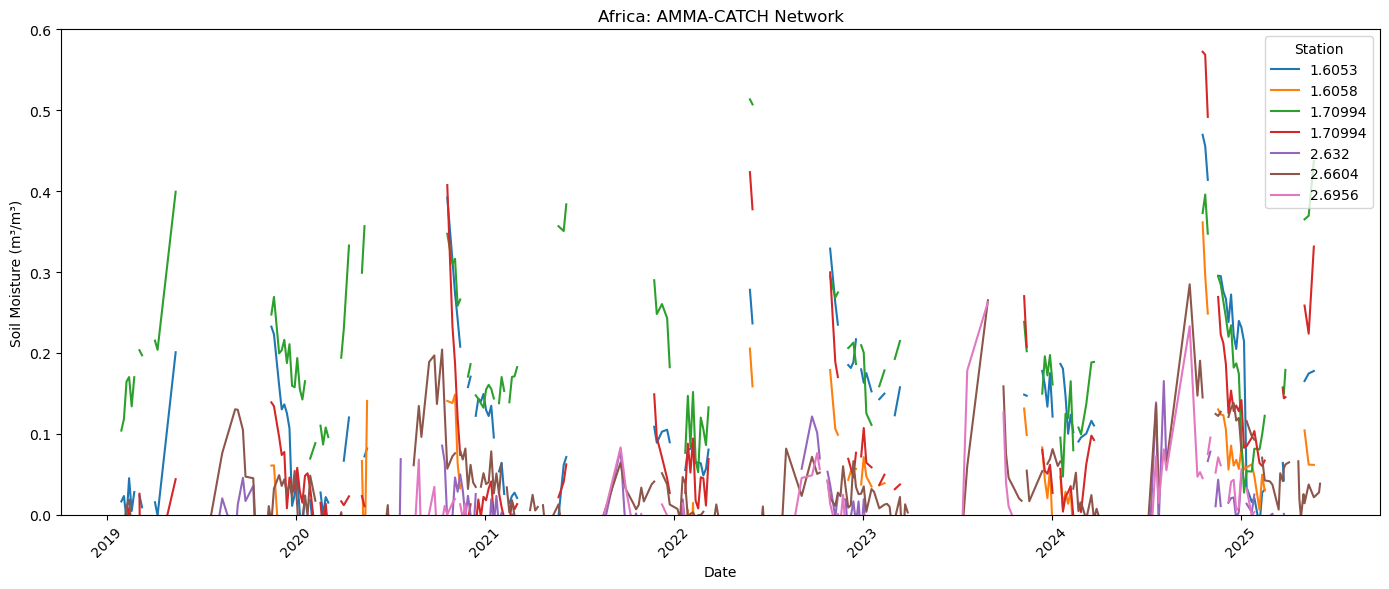

In [144]:
# Identify key columns
station_col = df.columns[3]     # Adjust if needed
date_columns = df.columns[14:-1]  # O onward, excluding 'geometry'
date_index = pd.to_datetime(date_columns, errors='coerce')

# Start plotting
plt.figure(figsize=(14, 6))

for i in range(len(df)):
    station = df.iloc[i][station_col]
    soil_moisture_values = df.iloc[i][14:-1].astype(float)  # O onward
    plt.plot(date_index, soil_moisture_values, label=station)

# Final plot styling
plt.title("Africa: AMMA-CATCH Network")
plt.xlabel("Date")
plt.ylabel("Soil Moisture (m³/m³)")
plt.ylim(0,0.6)
plt.xticks(rotation=45)
plt.legend(title="Station", bbox_to_anchor=(1, 1), loc='upper right')
plt.tight_layout()
plt.show()


In [18]:
import plotly.graph_objs as go

# Identify key columns
station_col = df.columns[3]
date_columns = df.columns[14:-1]  # O onward, exclude geometry
date_index = pd.to_datetime(date_columns, errors='coerce')

# Initialize figure
fig = go.Figure()

# Add trace for each station
for i in range(len(df)):
    station = df.iloc[i][station_col]
    soil_moisture_values = df.iloc[i][14:-1].astype(float)

    fig.add_trace(go.Scatter(
        x=date_index,
        y=soil_moisture_values,
        mode='lines',
        name=station,
        hovertemplate='Date: %{x}<br>Soil Moisture: %{y:.3f}<extra>%{text}</extra>',
        text=[station]*len(date_index)  # add station as extra info
    ))

# Layout
fig.update_layout(
    title="Africa: AMMA-CATCH Network",
    xaxis_title="Date",
    yaxis_title="Soil Moisture (m³/m³)",
    legend_title="Station",
    hovermode="x unified",
    yaxis=dict(range=[0, 0.5]),  # set y-axis limits
    width=1500,
    height=600
)

fig.write_html(r"C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_interactive_plot.html", auto_open=True)



### Plot satellite variables

In [153]:
variable='NDVI'
# Load the processed CSV file
csv_file=fr"C:\Users\aksha\Desktop\Personal\encode_nature\soil_moisture\ismn_stations\satellite_data\africa\{variable}\AMMA-CATCH.csv"
df=pd.read_csv(csv_file)
df.head()


,network,station,Latitude,Longitude,2018-02-08,2018-02-23,2018-12-15,2018-12-20,2018-12-25,2018-12-30,...,2025-04-22,2025-04-24,2025-04-27,2025-05-02,2025-05-04,2025-05-12,2025-05-22,2025-06-01,2025-06-03,2025-06-13
0,AMMA-CATCH,Nalohou-Mid,9.74530,1.60530,NaN,NaN,0.384868,0.371429,0.224597,0.328571,...,NaN,NaN,NaN,NaN,0.504015,0.505461,0.438071,NaN,NaN,NaN
1,AMMA-CATCH,Nalohou-Top,9.74407,1.60580,NaN,NaN,0.190989,0.191392,0.156977,0.178302,...,NaN,NaN,NaN,NaN,0.444019,0.404215,0.333333,NaN,NaN,NaN
2,AMMA-CATCH,Belefoungou-Top,9.78986,1.70994,NaN,NaN,0.440678,0.372263,0.256853,0.337770,...,NaN,NaN,NaN,NaN,0.650862,0.664430,0.705882,NaN,NaN,NaN
3,AMMA-CATCH,Belefoungou-Mid,9.79506,1.70994,NaN,NaN,0.429393,0.362598,0.233784,0.350755,...,NaN,NaN,NaN,NaN,0.611619,0.600651,0.599227,NaN,NaN,NaN
4,AMMA-CATCH,Wankama,13.64560,2.63200,0.181831,0.133877,0.208094,NaN,0.166570,NaN,...,0.16639,0.154257,0.129084,NaN,0.155337,0.146490,NaN,0.17933,0.12388,0.12684


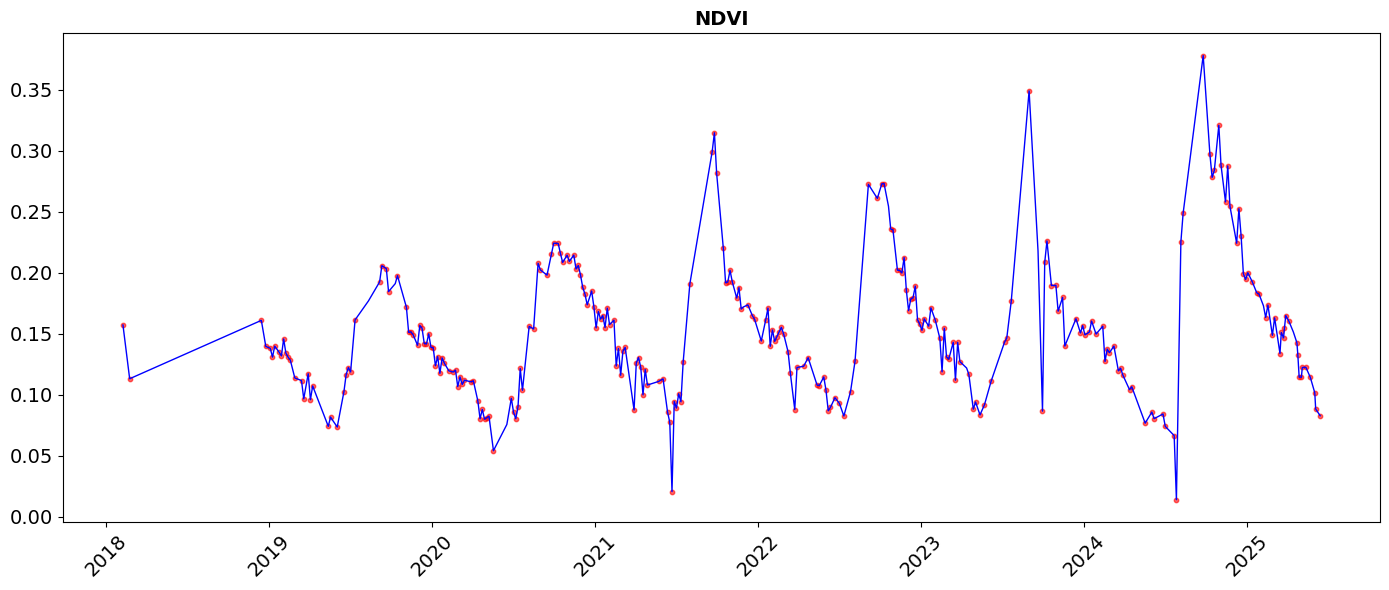

In [154]:
# Identify key columns
station_col = df.columns[1]     # Adjust if needed
date_columns = df.columns[4:]  # O onward, excluding 'geometry'   # Adjust if needed
date_columns = df.columns[4:]  # O onward, excluding 'geometry'
date_index = pd.to_datetime(date_columns, errors='coerce')
date_index


# Start plotting
plt.figure(figsize=(14, 6))
for i in range(len(df)):
    station = df.iloc[i][station_col]
    values = df.iloc[i][4:].astype(float)
    df_station = pd.DataFrame({'date': date_index, 'value': values})
    df_station = df_station.sort_values('date')
    df_station['interp'] = df_station['value'].interpolate()
    if station=='Tondikiboro':
        plt.scatter(df_station['date'], df_station['value'], label=f"{station} (raw)", color='red',s=10, alpha=0.6)
        plt.plot(df_station['date'], df_station['interp'], label=f"{station} (interp)", color='blue',linewidth=1)
    # plt.scatter(df_station['date'], df_station['value'], label=f"{station} (raw)", color='red',s=10, alpha=0.6)
    # plt.plot(df_station['date'], df_station['interp'], label=f"{station} (interp)", color='blue',linewidth=1)
# Final plot styling
plt.title(f"{variable}",fontsize=14, fontweight='bold')
# plt.xlabel("Date")
#plt.ylabel(f"{variable}",fontsize=14, fontweight='bold')
# plt.ylim(-15,0)
plt.xticks(rotation=45)
plt.tick_params(axis='both', labelsize=14)  # 12 is the font size for both axes

# plt.legend(title="Station", bbox_to_anchor=(1, 1), loc='upper right')
plt.tight_layout()
plt.show()
